## Gathering Data

In [11]:
#Import useful libraries
import numpy as np
import pandas as pd
import os
import requests
import tweepy
import json
import csv
import sys
from twitter import Twitter, OAuth, TwitterHTTPError, TwitterStream
from tweepy import OAuthHandler
from datetime import datetime,timedelta

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


#Make sure the plots show up in the notebook
%matplotlib inline

In [2]:
#Load twitter_archive_enhanced.csv file into a pandas dataframe
twitter_archive = pd.read_csv('/Users/iris/Documents/udacity/udacity_data wrangle/twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
##Use requests to load in the image_predictions.tsv file

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file: file.write(response.content)

predictions = pd.read_table('image_predictions/image-predictions.tsv', sep='\t')

In [5]:
predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [6]:
#Use tweepy to gather twitter data
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [ ]:
tweet_ids = list(twitter_archive.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

In [ ]:
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [7]:
tweet = pd.read_json('/Users/iris/Documents/udacity/udacity_data wrangle/tweet_json.txt',orient='index')

In [8]:
tweet.head(3)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2529,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,527,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,132,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,128,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."


## Assessing data
Now that we have all the data gathered, we can take a closer look at it and see what cleaning needs to be performed.
Ideally, by the end of this section I would like to end up with a single clean dataframe, ready for visualizations and further analysis. 

In [15]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2350 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2350 non-null datetime64[ns]
entities                         2350 non-null object
extended_entities                1826 non-null object
favorite_count                   2350 non-null int64
favorited                        2350 non-null int64
geo                              0 non-null float64
id                               2350 non-null int64
id_str                           2350 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

It appears that there are some column with no non-null values (such as geo and coordinates). I will drop those as they are not adding any information to the analysis. I will also drop the column "place" as it only has a single record (out of 2350). Same logican can be applied to all in_reply columns: they do not contain a lot of useful data.

In [18]:
# Create a new DF to keep track of tweet data
tweet_clean = tweet.copy()
tweet_clean.head(2)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2529,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,527,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,132,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."


## Tidiness and quality issues in the data:
Before I move forward to the cleaning of the data, I would first like to outline what issues in particular I'll be addressing and what changes will be made.

### Quality Issues:
** twitter_archive file **
* Rows that indicate that a tweet has been retweeted need to be dropped. They are not the original tweet from WeRateDogs and therefore pollute the data. Columns that pertain to this are: <br>
    * retweeted_status_id	
    * retweeted_status_user_id
    * retweeted_status_timestamp <br>

** tweet file **
* Similarly to twttier_archive, columns that are related to retweets will be dropped. Those include:
    * retweet_count	
    * retweeted	
    * retweeted_status
* Drop columns that either have too few entries or do not pertain to the later analysis. For example:
    * geo (too few entries to be relevant)
    * in_reply_to_screen_name (information not relevant to the scope of this analysis)
    * place (similarly to geo, too few entires to build an analysis on)
    * other, listen in the cleaning section

** predictions file **
* Some of the god names are misslabeled - needs to be addressed

### Tidiness
** predictions file **
* Fix capitalization to make is the data more consistent and easier to interpret

** tweet file **
* The column named id needs to be changed to tweet_id to make it possible to merge the dataframe together with predictions and archive dataframes

** tweet, predictions, and twitter_archive files **
* Once the data frames are cleaned, they need to be joined into one to make analysis possible

## Cleaning the data

### Cleaning the tweet file
* Being by creating a new datafram, tweet_clean, to keep track of the edits.
* Address aformentioned tidiness issues

** Define ** <br>
Let's drop the columns that distract from our analysis.

** Code **

In [19]:
#Drop unecessary columns
tweet_clean.drop(['contributors', 'coordinates','created_at', 'entities',
                  'extended_entities', 'favorited', 'geo', 'id_str', 'in_reply_to_screen_name',
                  'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id',
                  'in_reply_to_user_id_str','is_quote_status', 'lang', 'place', 'possibly_sensitive',
                  'possibly_sensitive_appealable', 'quoted_status','quoted_status_id','quoted_status_id_str',
                  'retweeted','retweeted_status','source','truncated','user'], axis=1,inplace=True)

In [20]:
tweet_clean.head(2)

,favorite_count,id,retweet_count,text
1991-02-08 13:48:08.022790149,2529,666020888022790144,527,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,132,666029285002620928,47,This is a western brown Mitsubishi terrier. Up...


The 'id' field in tweet_clean corresponds to 'tweet_id' in twitter_archive dataframe. In order to be able to perge those together later, I will give it the same name.

In [21]:
tweet_clean.rename(columns={'id': 'tweet_id'}, inplace=True)
tweet_clean.head(2)

,favorite_count,tweet_id,retweet_count,text
1991-02-08 13:48:08.022790149,2529,666020888022790144,527,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,132,666029285002620928,47,This is a western brown Mitsubishi terrier. Up...


** Test ** 

Let's make sure the edits are stored correctly:

In [22]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2350 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 4 columns):
favorite_count    2350 non-null int64
tweet_id          2350 non-null int64
retweet_count     2350 non-null int64
text              2350 non-null object
dtypes: int64(3), object(1)
memory usage: 91.8+ KB


Now that the field is the same and there no null values left, I can move on to cleaning up the other two dataframes.

### Cleaning the predictions file
* Being by creating a new datafram, pred_clean, to keep track of the edits.
* Address aformentioned tidiness issues

In [12]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
pred_clean = predictions.copy()
pred_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


** Define ** <br>
Seems like there are come inconsistencies in capitalization in p1, p2, and p3 columns. I will change that just to make later visualizations more appealing.

** Code **

In [28]:
#Use str.title() to capitalize words
#pred_clean['p1','p2','p3')] = pred_clean[('p1','p2','p3')].str.title()
pred_clean['p1'] = pred_clean['p1'].str.title()
pred_clean['p2'] = pred_clean['p2'].str.title()
pred_clean['p3'] = pred_clean['p3'].str.title()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_Mountain_Dog,0.651137,True,English_Springer,0.263788,True,Greater_Swiss_Mountain_Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_Turtle,0.933012,False,Mud_Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan_Mastiff,0.058279,True,Fur_Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_Cart,0.962465,False,Shopping_Basket,0.014594,False,Golden_Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated_Wheaten_Terrier,0.082086,True


** Test **

In [ ]:
pred_clean.head(10)

Doesn't seem like there is a lot more that could be done with this particular df. I will move onto twitter_archive for the time being.

### Cleaning the twitter_archive file
* Being by creating a new datafram, twitter_archive_clean, to keep track of the edits.
* Address aformentioned tidiness issues

In [29]:
twitter_archive_clean = twitter_archive.copy()

In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

** Define ** <br> 
I will drop rows that indicate that this was a reply tweet. I will also drop the rows that belongs to a retweet status colimn.

In [31]:
twitter_archive_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


** Code **

In [34]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].notnull()== True].index,inplace=True)

In [46]:
#Drop column
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
                  'retweeted_status_timestamp'], axis=1,inplace=True)

ValueError: labels ['in_reply_to_status_id' 'in_reply_to_user_id' 'retweeted_status_id'
 'retweeted_status_user_id' 'retweeted_status_timestamp'] not contained in axis

In [47]:
#Drop column
twitter_archive_clean.drop(['text'], axis=1,inplace=True)

In [39]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['in_reply_to_user_id'].notnull()== True].index,inplace=True)

** Test **

In [48]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


### Merging the files
Now that the three separate files are clean, let's merge them into one dataframe. This will allow for easier analysis and visualization moving forward.

In [1]:
df_working = pd.merge(tweet_clean, twitter_archive_clean,on='tweet_id', how='inner')

NameError: name 'pd' is not defined

In [51]:
df_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371 entries, 0 to 1370
Data columns (total 14 columns):
favorite_count        1371 non-null int64
tweet_id              1371 non-null int64
retweet_count         1371 non-null int64
text                  1371 non-null object
timestamp             1371 non-null object
source                1371 non-null object
expanded_urls         1369 non-null object
rating_numerator      1371 non-null int64
rating_denominator    1371 non-null int64
name                  1371 non-null object
doggo                 1371 non-null object
floofer               1371 non-null object
pupper                1371 non-null object
puppo                 1371 non-null object
dtypes: int64(5), object(9)
memory usage: 160.7+ KB


I will use an inned join to merge the dataframes to ensure we don't end up with rows with missing data in the working dataframe.

In [52]:
df_working = pd.merge(df_working, pred_clean,on='tweet_id', how='inner')

In [53]:
df_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 1284
Data columns (total 25 columns):
favorite_count        1285 non-null int64
tweet_id              1285 non-null int64
retweet_count         1285 non-null int64
text                  1285 non-null object
timestamp             1285 non-null object
source                1285 non-null object
expanded_urls         1285 non-null object
rating_numerator      1285 non-null int64
rating_denominator    1285 non-null int64
name                  1285 non-null object
doggo                 1285 non-null object
floofer               1285 non-null object
pupper                1285 non-null object
puppo                 1285 non-null object
jpg_url               1285 non-null object
img_num               1285 non-null int64
p1                    1285 non-null object
p1_conf               1285 non-null float64
p1_dog                1285 non-null bool
p2                    1285 non-null object
p2_conf               1285 non-null floa

Sanity check to make sure everything is in order.

In [54]:
df_working.head(10)

,favorite_count,tweet_id,retweet_count,text,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,132,666029285002620928,47,This is a western brown Mitsubishi terrier. Up...,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666029285...,7,10,a,...,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
1,308,666044226329800704,144,This is a purebred Piers Morgan. Loves to Netf...,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666044226...,6,10,a,...,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
2,1248,666051853826850816,874,This is an odd dog. Hard on the outside but lo...,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666051853...,2,10,an,...,1,Box_Turtle,0.933012,False,Mud_Turtle,0.045885,False,Terrapin,0.017885,False
3,304,666057090499244032,145,My oh my. This is a rare blond Canadian terrie...,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666057090...,9,10,a,...,1,Shopping_Cart,0.962465,False,Shopping_Basket,0.014594,False,Golden_Retriever,0.007959,True
4,117,666058600524156928,60,Here is the Rand Paul of retrievers folks! He'...,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666058600...,8,10,the,...,1,Miniature_Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated_Wheaten_Terrier,0.082086,True
5,154,666071193221509120,65,Here we have a northern speckled Rhododendron....,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666071193...,9,10,None,...,1,Gordon_Setter,0.503672,True,Yorkshire_Terrier,0.174201,True,Pekinese,0.109454,True
6,333,666073100786774016,172,Let's hope this flight isn't Malaysian (lol). ...,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666073100...,10,10,None,...,1,Walker_Hound,0.260857,True,English_Foxhound,0.175382,True,Ibizan_Hound,0.097471,True
7,161,666099513787052032,72,Can stand on stump for what seems like a while...,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666099513...,8,10,None,...,1,Lhasa,0.582330,True,Shih-Tzu,0.166192,True,Dandie_Dinmont,0.089688,True
8,81,666102155909144576,14,Oh my. Here you are seeing an Adobe Setter giv...,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666102155...,11,10,None,...,1,English_Setter,0.298617,True,Newfoundland,0.149842,True,Borzoi,0.133649,True
9,14656,666104133288665088,6808,Not familiar with this breed. No tail (weird)....,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666104133...,1,10,None,...,1,Hen,0.965932,False,Cock,0.033919,False,Partridge,0.000052,False


We can't harness information from the source url or exapanded_url. Therefore I will also drop these columns. 

In [55]:
#Drop column
df_working.drop(['source','expanded_urls'], axis=1,inplace=True)

In [59]:
df_working['timestamp'] = df_working['timestamp'].astype(str)

Now that we have a clean data frame with all all the fields of interest, we can move onto visualizations and further analysis.

## Visualizing and analysing the data

In [64]:
df_working.describe()

,favorite_count,tweet_id,retweet_count,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1285.000000,1.285000e+03,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1.285000e+03,1.285000e+03
mean,8426.484047,7.329309e+17,2594.266148,12.753307,10.458366,1.185214,0.587796,1.374101e-01,6.131634e-02
std,11521.611521,6.637011e+16,4109.274345,51.296879,7.180528,0.538198,0.273498,1.022734e-01,5.200999e-02
min,81.000000,6.660293e+17,14.000000,1.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1746.000000,6.748005e+17,603.000000,10.000000,10.000000,1.000000,0.354823,5.421470e-02,1.648340e-02
50%,3914.000000,7.065165e+17,1306.000000,11.000000,10.000000,1.000000,0.581403,1.203580e-01,4.944380e-02
75%,10454.000000,7.798343e+17,3093.000000,12.000000,10.000000,1.000000,0.837956,1.995440e-01,9.463860e-02
max,121433.000000,8.918152e+17,61341.000000,1776.000000,170.000000,4.000000,1.000000,4.676780e-01,2.710420e-01


Max favorite count for a tweet is 121433 - let's see if we can look up what it is.

In [66]:
df_working.loc[df_working['favorite_count'] == 121433]

,favorite_count,tweet_id,retweet_count,text,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1054,121433,807106840509214720,61341,This is Stephan. He just wants to help. 13/10 ...,2016-12-09 06:17:20 +0000,13,10,Stephan,None,None,...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy_Terrier,0.077008,True


In [68]:
## Use tweet id to look it up in the predictions file
predictions[predictions['tweet_id']==807106840509214720].jpg_url

1641    https://pbs.twimg.com/ext_tw_video_thumb/80710...
Name: jpg_url, dtype: object

In [69]:
predictions.loc[predictions['tweet_id'] == 807106840509214720]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True


In [70]:
df_working.loc[df_working['retweet_count'] == 61341]

,favorite_count,tweet_id,retweet_count,text,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1054,121433,807106840509214720,61341,This is Stephan. He just wants to help. 13/10 ...,2016-12-09 06:17:20 +0000,13,10,Stephan,None,None,...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy_Terrier,0.077008,True


It makes sense that the most favorited tweet also has the highest number of retweets. I imagine those two features are strongly correlated.
Perhaps we can explore that further.

In [71]:
df_working['favorite_count'].corr(df_working['retweet_count'])

0.9203935737660756

Indeed, there is a very high correlation coefficient between the two. Are there other features with high correlation?

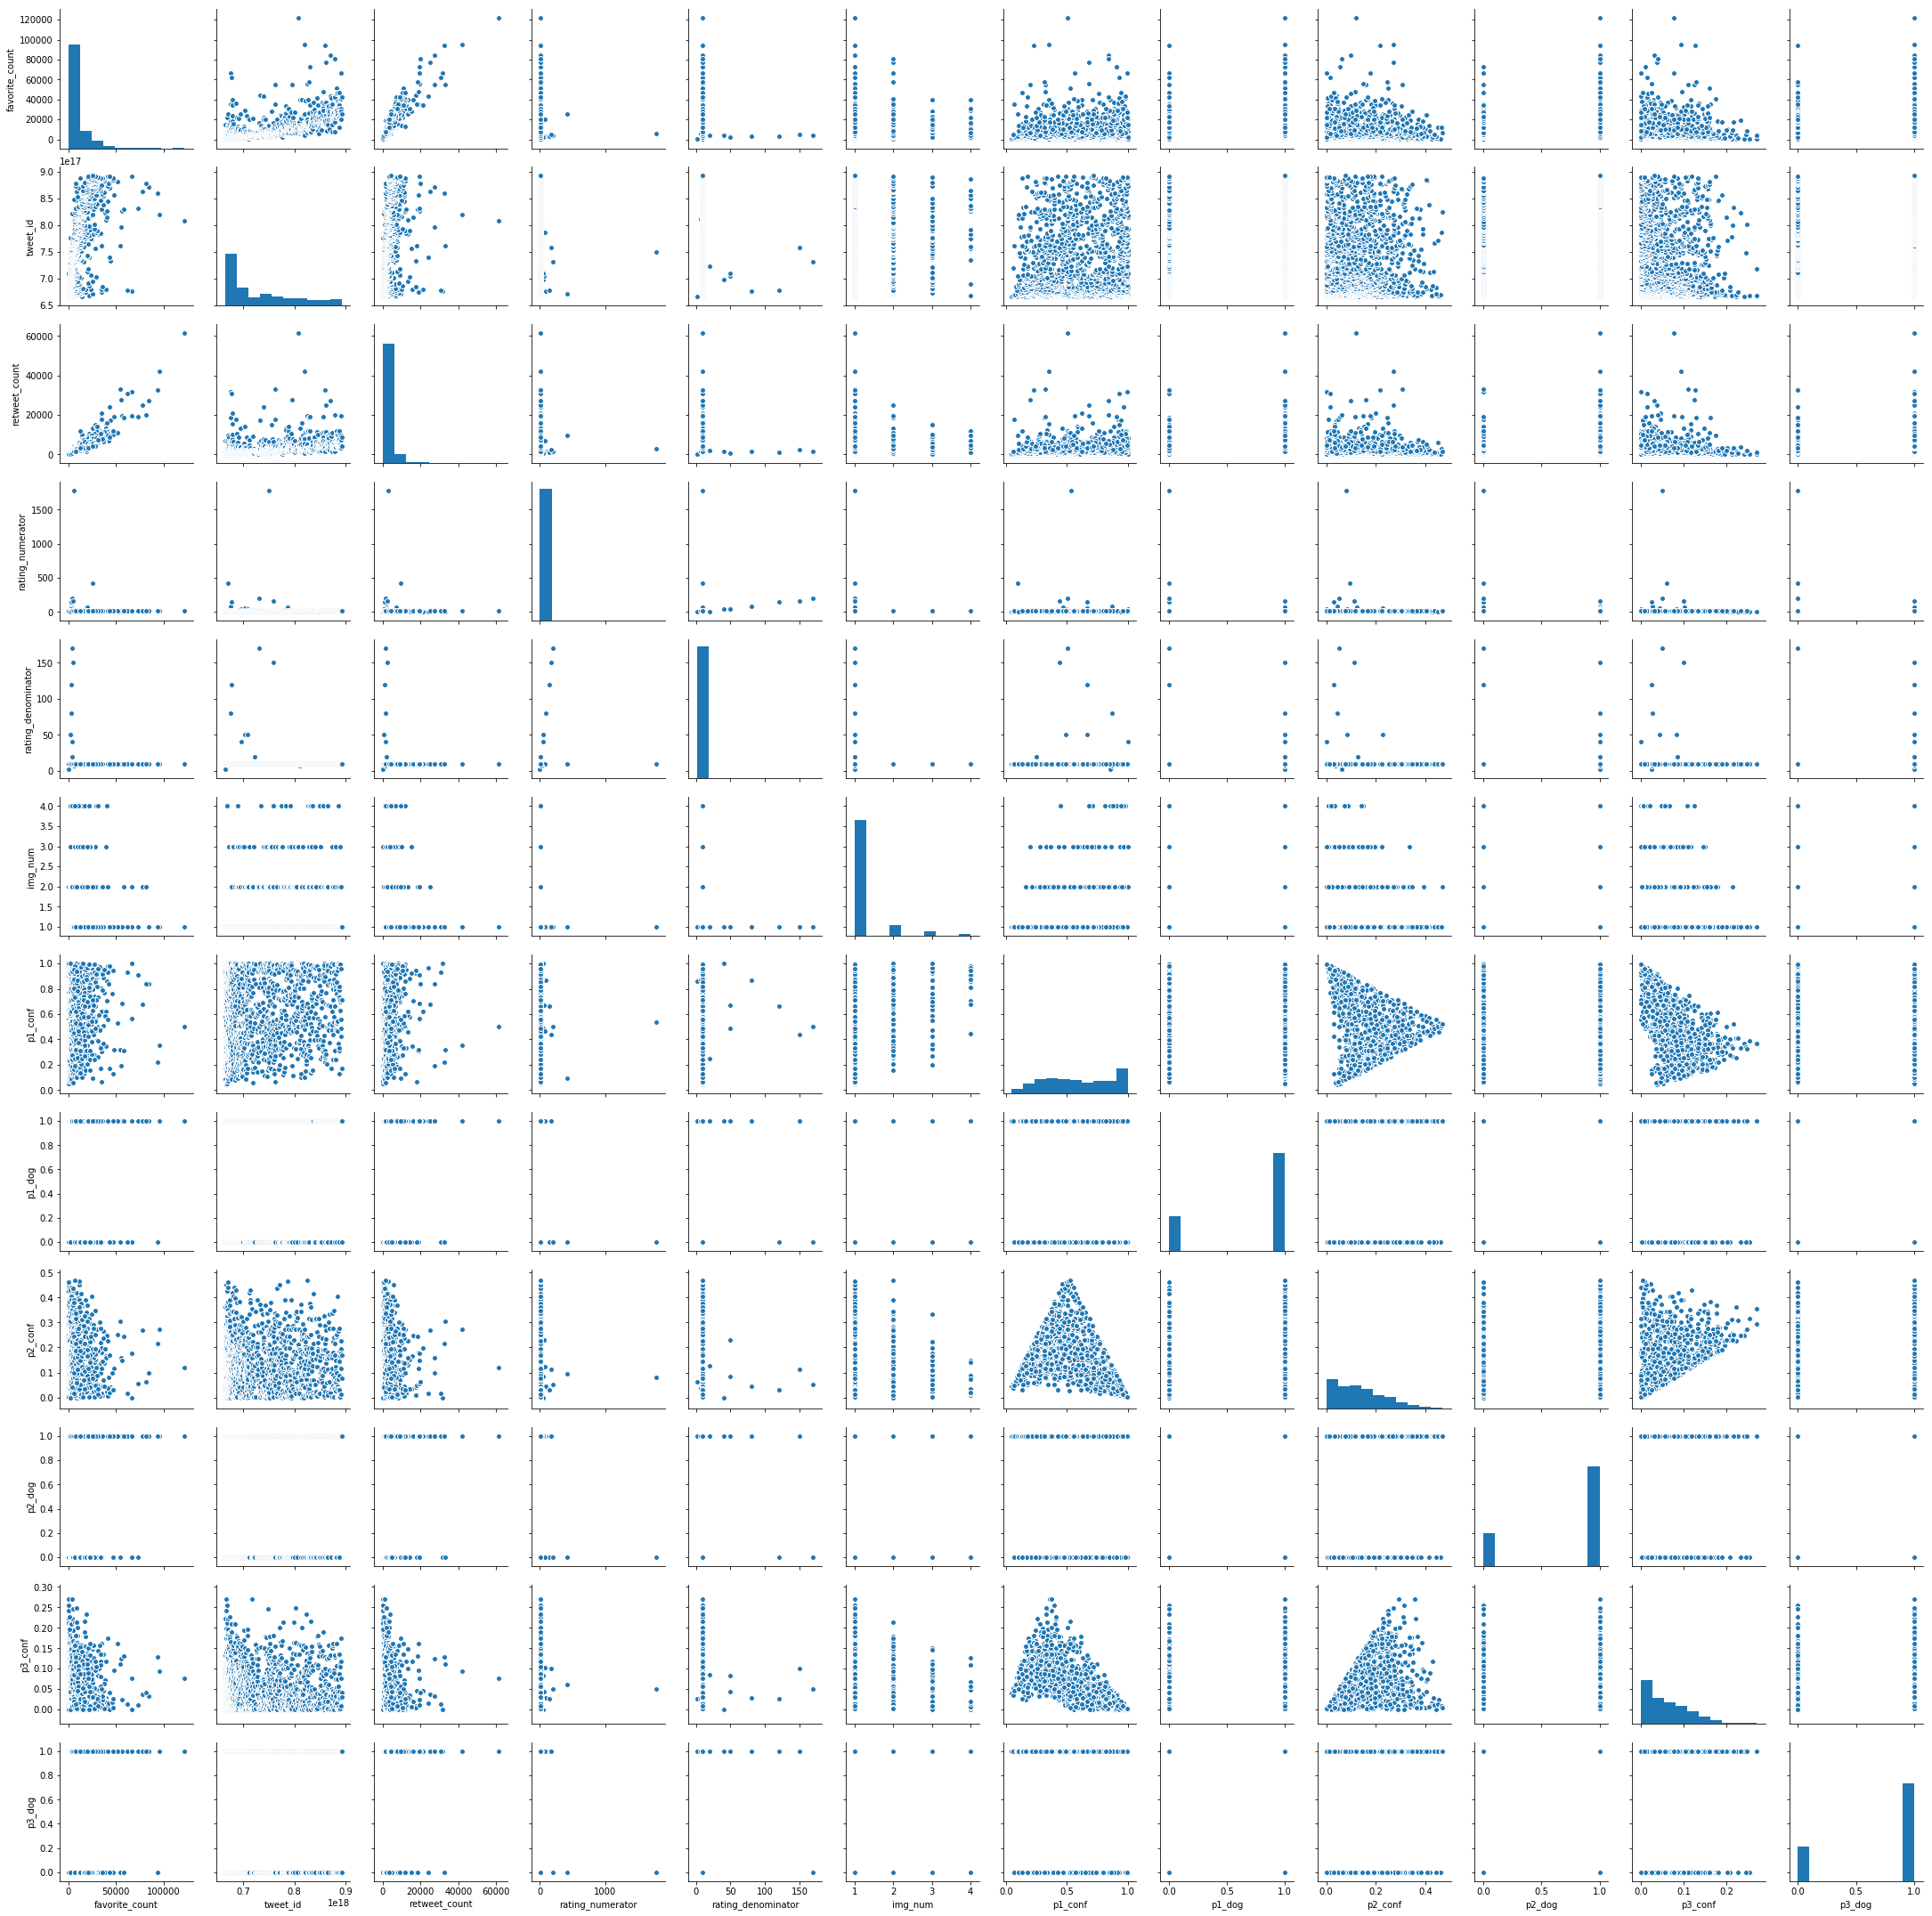

In [72]:
sns.pairplot(df_working);

The seaborn pairplot doesn't show alot of other correlations. It is a little hard to tell, but it seems as if the number of images in a tweet may relate negatively with the number of retweets. 
We can explore this a bit further.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17d927b8>]],
      dtype=object)

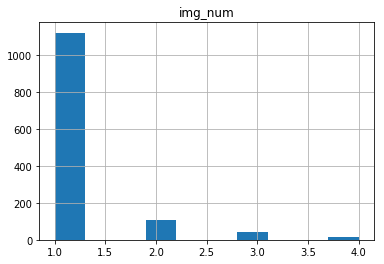

In [76]:
df_working.hist(column='img_num');

In [77]:
df_working['retweet_count'].corr(df_working['img_num'])

0.10905837889894626

The correlation is very low, however this may be hard to explore because there are very few tweets with 4 photos. There may simply not be enough data to make a solid claim. <br>
To makes sure the analysis performed above can be repeated, I will store the working dataframe to a flat file.

In [78]:
##Let's store the cleaned dataframe so it can be easily accesed later
df_working.to_csv('/Users/iris/Documents/udacity/udacity_data wrangle/twitter_archive_master.csv')